In [1]:
from app.dataManager import *
import math
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.30/02


In [2]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12

In [3]:
def valid_sample_condition(name):
    return True #'Showering' not in name and 'Sub-GeV' not in name and 'pi^{0}' not in name and '*' not in name

def get_counts(ana_master):
    tot_counts = []
    for i in range(len(ana_master.samples)):
        s = ana_master.samples[i]
        if valid_sample_condition(s.name):
            tot_counts += list(get_counts_from_hist(ana_master.samples[i].data_hist))
    return tot_counts

In [4]:
osc_pred = AnaMaster()

osc_pred.osc_weight_all()
osc_pred.fill_histograms()

Reaction Name: MCNumuBar
Reaction Name: MCNutau
Reaction Name: MCNC
Reaction Name: MCNue
Reaction Name: MCNumu
Reaction Name: MCNueBar
Reaction Name: MCTotal
MASK BINS:  True
Loading Density profile from: ../data/PREM.dat


In [5]:
osc_pred.OscProb.t12, osc_pred.OscProb.t13, osc_pred.OscProb.t23, osc_pred.OscProb.dm21, osc_pred.OscProb.mAtm, osc_pred.OscProb.delta 

(0.307, 0.022, 0.58, 7.53e-05, 0.0024, 4.53)

In [6]:
use_data = False

In [7]:
data = AnaMaster()

if use_data:
    for i in range(len(data.samples)):
        data.samples[i].set_SK_true_data_as_data_hist()

Reaction Name: MCNumuBar
Reaction Name: MCNutau
Reaction Name: MCNC
Reaction Name: MCNue
Reaction Name: MCNumu
Reaction Name: MCNueBar
Reaction Name: MCTotal
MASK BINS:  True
Loading Density profile from: ../data/PREM.dat


In [8]:
all_obs = []
all_exp = []
all_chi2 = []
all_names = []
sample_edges = []
sample_edges.append(0)

for i in range(len(osc_pred.samples)):
    
    s = osc_pred.samples[i]
    if valid_sample_condition(s.name):

        observed = get_counts_from_hist(data.samples[i].data_hist)
        expected = get_counts_from_hist(osc_pred.samples[i].data_hist)
        
        for E,O in zip(expected, observed):
            if O >0:
                all_chi2.append((E-O)+O*np.log(O/E))
            else:
                all_chi2.append(0)
                
            all_obs.append(O)
            all_exp.append(E)

        sample_edges.append(len(all_exp))
        all_names.append(s.name)
        
        chi2 = calc_chi2(expected, observed)
        print(s.name, s.nbins, chi2)

all_obs =  np.reshape(all_obs,-1)
all_exp =  np.reshape(all_exp,-1)
all_chi2 = np.reshape(all_chi2,-1)

sample_edges = np.array(sample_edges)

sample_center = sample_edges[0:-1]+(sample_edges[1:]-sample_edges[0:-1])/2

Sub-GeV  e-like 0 d.e.* 50 0.6849694628837796
Sub-GeV  e-like 1 d.e.* 5 0.646800839613761
1-ring #pi^{0}-like 5 0.07122083460840423
Sub-GeV #mu-like 0 d.e.* 50 202.41909002543753
Sub-GeV #mu-like 1 d.e.* 50 520.0301067806739
Sub-GeV #mu-like 2 d.e.* 5 24.958102165107846
2-ring #pi^{0}-like 5 0.07936493407592005
Multi-GeV #nu_{e}-like* 40 21.581860187817124
Multi-GeV #bar{#nu}_{e}-like* 40 3.0770063780620767
Multi-GeV #mu-like* 20 198.95084201549253
Multi-GeV Multi-Ring #nu_{e}-like 30 31.356095670917323
Multi-GeV Multi-Ring #bar{#nu}_{e}-like 30 9.551410158080603
Multi-GeV Multi-Ring #mu-like 40 338.4012205273393
Multi-GeV Multi-Ring  Other 40 133.39925272399742
PC  Stopping 20 60.02764539051651
PC  Through-going 40 343.7968172077338
Up-#mu Stopping 30 300.46807540197767
Up-#mu Non-Showering 10 25.040196769603014
Up-#mu Showering 10 0.32126920588668817
Sub-GeV #nu_{e}-like 50 1.3401205461053902
Sub-GeV #bar{#nu}_{e}-like 0 n 50 0.7357512871033591
Sub-GeV #bar{#nu}_{e}-like 1 n 50 0.167

0 Sub-GeV  e-like 0 d.e.*
1 Sub-GeV  e-like 1 d.e.*
2 1-ring #pi^{0}-like
3 Sub-GeV #mu-like 0 d.e.*
4 Sub-GeV #mu-like 1 d.e.*
5 Sub-GeV #mu-like 2 d.e.*
6 2-ring #pi^{0}-like
7 Multi-GeV #nu_{e}-like*
8 Multi-GeV #bar{#nu}_{e}-like*
9 Multi-GeV #mu-like*
10 Multi-GeV Multi-Ring #nu_{e}-like
11 Multi-GeV Multi-Ring #bar{#nu}_{e}-like
12 Multi-GeV Multi-Ring #mu-like
13 Multi-GeV Multi-Ring  Other
14 PC  Stopping
15 PC  Through-going
16 Up-#mu Stopping
17 Up-#mu Non-Showering
18 Up-#mu Showering
19 Sub-GeV #nu_{e}-like
20 Sub-GeV #bar{#nu}_{e}-like 0 n
21 Sub-GeV #bar{#nu}_{e}-like 1 n
22 Sub-GeV #nu_{#mu}-like
23 Sub-GeV #bar{#nu}_{#mu}-like
24 Multi-GeV #nu_{e}-like
25 Multi-GeV #bar{#nu}_{e}-like 0 n
26 Multi-GeV #bar{#nu}_{e}-like 1 n
27 Multi-GeV #nu_{#mu}-like
28 Multi-GeV #bar{#nu}_{#mu}-like


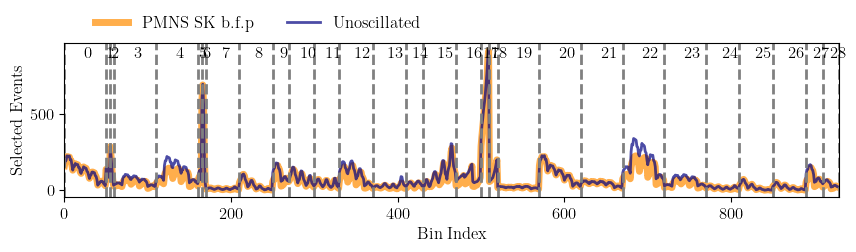

In [9]:
plt.figure(figsize=(10, 2))

N = len(all_obs)

plt.plot(range(N), all_exp, lw=5, color='darkorange', label='PMNS SK b.f.p', alpha=0.7)
if use_data == True:
    plt.plot(range(N), all_obs, lw=2, color='navy', label='SK Data', alpha=0.7)
else:
    plt.plot(range(N), all_obs, lw=2, color='navy', label='Unoscillated', alpha=0.7)


for x in sample_edges:
    plt.axvline(x, lw=2, color='gray', linestyle='--')

for i,x in enumerate(sample_center):
    plt.text(x-1.5, plt.gca().get_ylim()[1]*0.9, i)

    print(i, all_names[i])

plt.gca().set_xlim(0,N)
plt.gca().set_xlabel('Bin Index')
plt.gca().set_ylabel('Selected Events')
plt.legend(ncol=2, bbox_to_anchor=(0.02, 0.98), frameon=False)

In [10]:
np.sum(all_obs), np.sum(all_exp), (np.sum(all_obs)-np.sum(all_exp))/np.sqrt(np.sum(all_exp))

(76440.15747630596, 62504.52261984348, 55.74052271677949)

0 Sub-GeV  e-like 0 d.e.*
1 Sub-GeV  e-like 1 d.e.*
2 1-ring #pi^{0}-like
3 Sub-GeV #mu-like 0 d.e.*
4 Sub-GeV #mu-like 1 d.e.*
5 Sub-GeV #mu-like 2 d.e.*
6 2-ring #pi^{0}-like
7 Multi-GeV #nu_{e}-like*
8 Multi-GeV #bar{#nu}_{e}-like*
9 Multi-GeV #mu-like*
10 Multi-GeV Multi-Ring #nu_{e}-like
11 Multi-GeV Multi-Ring #bar{#nu}_{e}-like
12 Multi-GeV Multi-Ring #mu-like
13 Multi-GeV Multi-Ring  Other
14 PC  Stopping
15 PC  Through-going
16 Up-#mu Stopping
17 Up-#mu Non-Showering
18 Up-#mu Showering
19 Sub-GeV #nu_{e}-like
20 Sub-GeV #bar{#nu}_{e}-like 0 n
21 Sub-GeV #bar{#nu}_{e}-like 1 n
22 Sub-GeV #nu_{#mu}-like
23 Sub-GeV #bar{#nu}_{#mu}-like
24 Multi-GeV #nu_{e}-like
25 Multi-GeV #bar{#nu}_{e}-like 0 n
26 Multi-GeV #bar{#nu}_{e}-like 1 n
27 Multi-GeV #nu_{#mu}-like
28 Multi-GeV #bar{#nu}_{#mu}-like


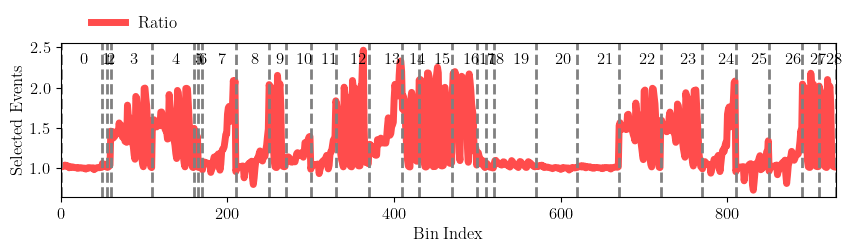

In [11]:
plt.figure(figsize=(10, 2))

N = len(all_obs)

plt.plot(range(N), all_obs/all_exp, lw=5, color='red', label='Ratio', alpha=0.7)

for x in sample_edges:
    plt.axvline(x, lw=2, color='gray', linestyle='--')

for i,x in enumerate(sample_center):
    plt.text(x-1.5, plt.gca().get_ylim()[1]*0.9, i)

    print(i, all_names[i])

plt.gca().set_xlim(0,N)
plt.gca().set_xlabel('Bin Index')
plt.gca().set_ylabel('Selected Events')
plt.legend(ncol=2, bbox_to_anchor=(0.02, 0.98), frameon=False)

1.2804394798308407

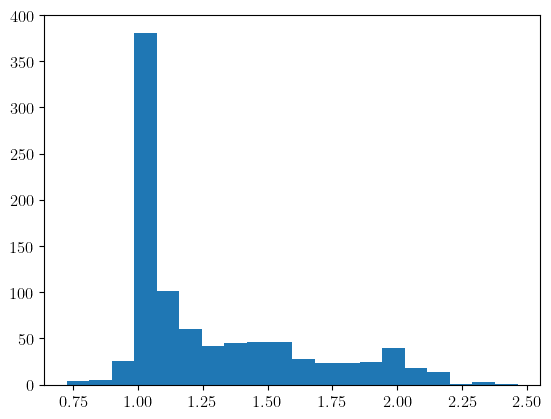

In [12]:
_ = plt.hist(all_obs/all_exp, bins=20)
np.mean(all_obs/all_exp)

tot chi2:  3485.3631631619805
tot chi2/ndof:  3.747702325980624


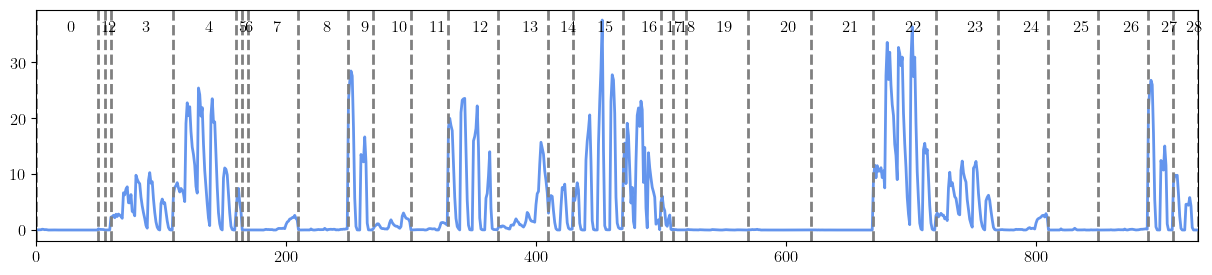

In [13]:
plt.figure(figsize=(15, 3))

N = len(all_obs)

plt.plot(range(N), all_chi2, lw=2, color='cornflowerblue')

for x in sample_edges:
    plt.axvline(x, lw=2, color='gray', linestyle='--')

plt.gca().set_xlim(0,N)

for i,x in enumerate(sample_center):
    plt.text(x, plt.gca().get_ylim()[1]*0.9, i)

print('tot chi2: ', np.sum(all_chi2))
print('tot chi2/ndof: ', np.sum(all_chi2)/len(all_chi2))

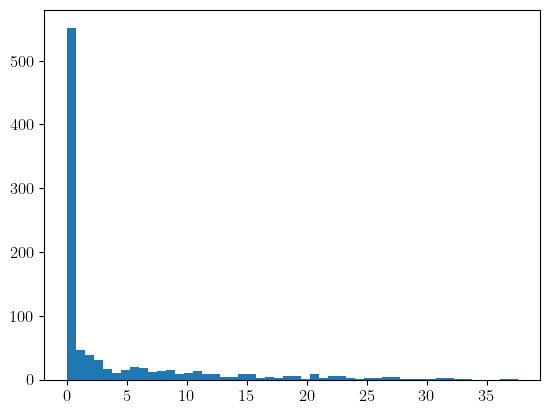

In [14]:
_ = plt.hist(all_chi2, bins=50)

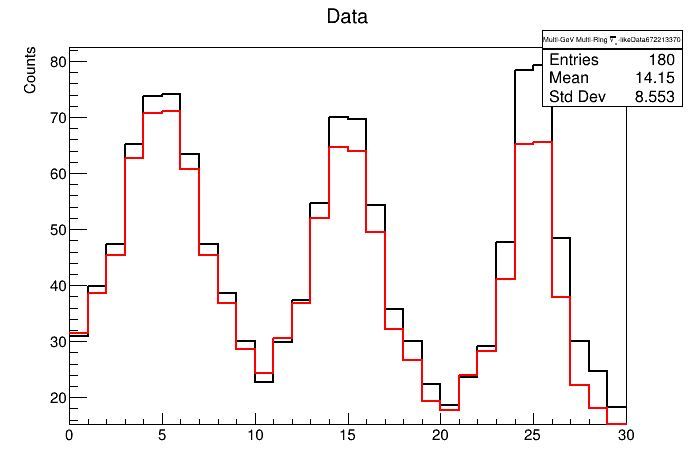

In [15]:
n = 11

c=ROOT.TCanvas()
c.cd()
data.samples[n].data_hist.Draw("HIST")
osc_pred.samples[n].data_hist.SetLineColor(ROOT.kRed)
osc_pred.samples[n].data_hist.Draw("HIST same")

c.Draw()

In [16]:
import ROOT
c1 = ROOT.TCanvas("c1", "c1")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [17]:
ROOT.GetObject("c1")

AttributeError: Failed to get attribute GetObject from ROOT